In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
import pandas as pd
train = pd.read_csv("TrainData.csv")
test = pd.read_csv("TestData.csv")


In [ ]:
import numpy as np
from scipy import stats
# funzione per organizzare il dataset
def create_dataset(X, y, time_steps, step):
    Xs, ys = [], [] # inizializzo due liste vuote
    if step !=0:
      for i in range(0, len(X) - time_steps, step): # ciclo for che parte da zero alla lughezza di (X-time_steps), con passo di step
          v = X.iloc[i:(i + time_steps)].values # del DataFrame prendo i valori che vanno da i fino ad i+time_steps
          labels = y.iloc[i: i + time_steps] # stessa cosa con le labels
          Xs.append(v) # aggiunge un item in coda alla lista
          ys.append(stats.mode(labels)[0][0]) # ad ogni finestra corrisponderà un valore di una classe
    else:
      for i in range(0, len(X) - time_steps, time_steps): # ciclo for che parte da zero alla lughezza di (X-time_steps), con passo di  time_steps
          v = X.iloc[i:(i + time_steps)].values # del DataFrame prendo i valori che vanno da i fino ad i+time_steps
          labels = y.iloc[i: i + time_steps] # stessa cosa con le labels
          Xs.append(v) # aggiunge un item in coda alla lista
          ys.append(stats.mode(labels)[0][0]) # ad ogni finestra corrisponderà un valore di una classe
    return np.array(Xs), np.array(ys).reshape(-1, 1) # output della funzione resistuisce Xs come un array e Ys come un vettore


TIME_STEPS = 200
STEP = 40
# richiamo la funzione per creare X_train e Y_train
X_train, Y_train = create_dataset(
    df_train[['x-axis', 'y-axis', 'z-axis']],
    df_train.act,
    TIME_STEPS,
    STEP
)
TIME_STEPS = 200
STEP = 0
# richiamo la funzione per creare X_test e Y_test

X_test, Y_test = create_dataset(
    df_test[['x-axis', 'y-axis', 'z-axis']],
    df_test.act,
    TIME_STEPS,
    STEP
)

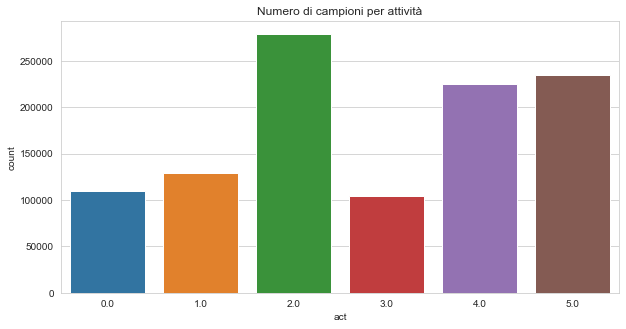

In [16]:
sns.set_style("whitegrid") 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'act', data = train) 
plt.title('Numero di campioni per attività') 
plt.show()


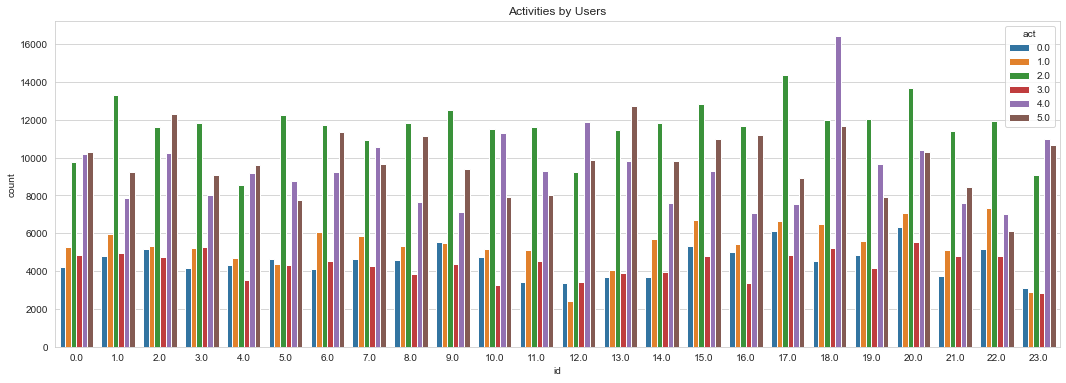

In [17]:
plt.figure(figsize = (18, 6)) 
sns.countplot(x = 'id', hue = 'act', data = train) 
plt.title('Activities by Users') 
plt.show()


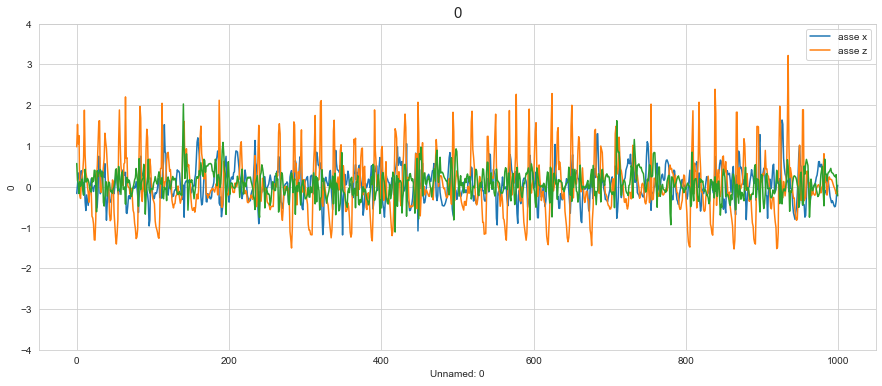

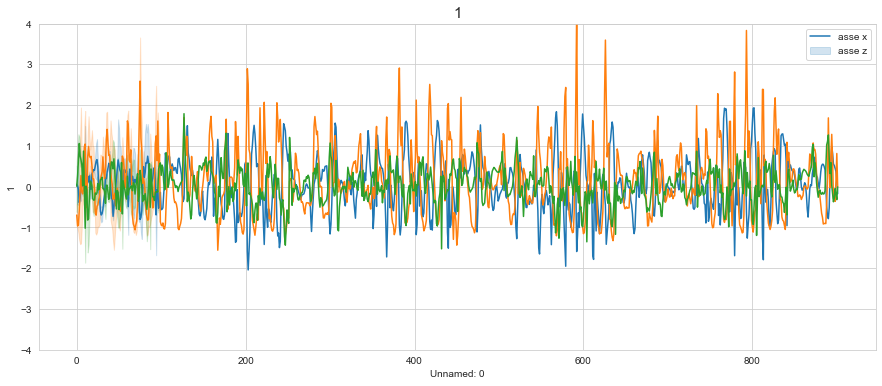

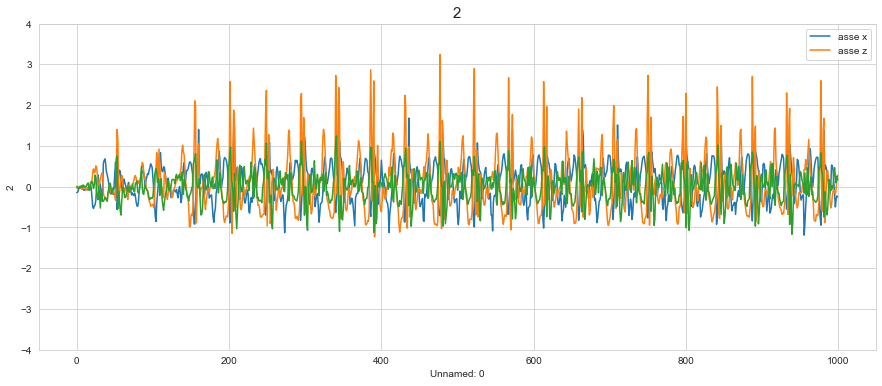

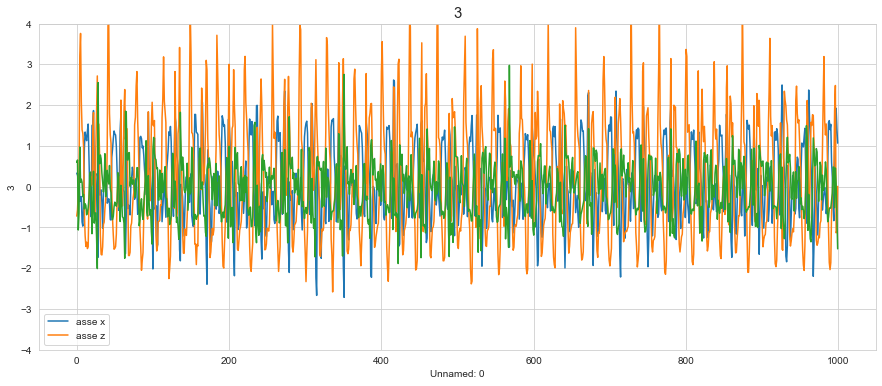

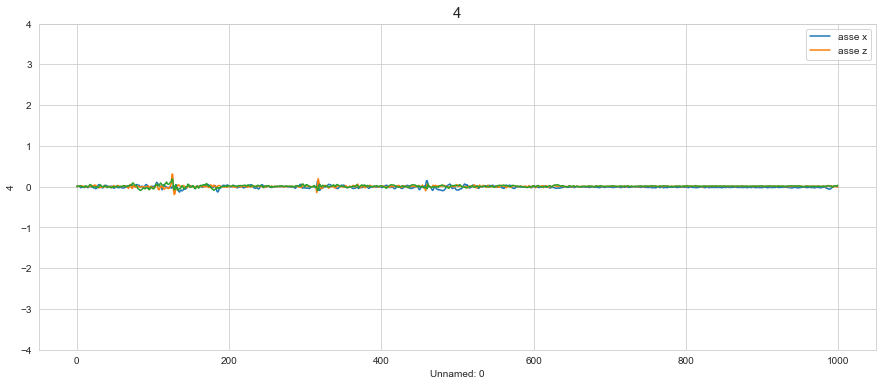

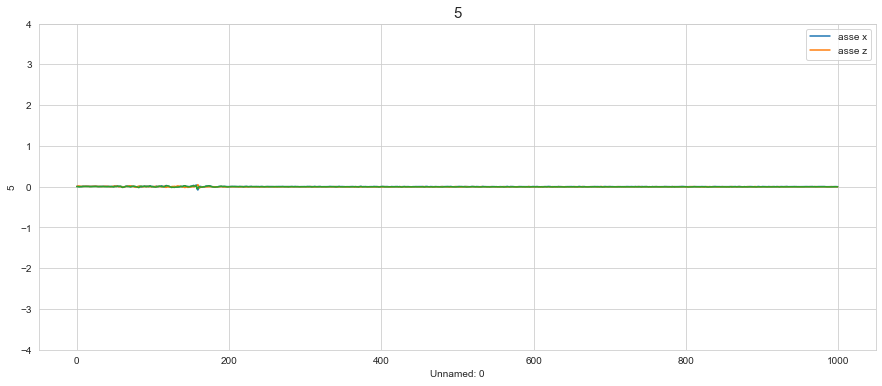

In [37]:
for i in range(6): 
  data_36 = train[(train['id'] == 12) & (train['act'] == i)][:1000] 
  plt.figure(figsize = (15, 6)) 
  sns.lineplot(x = "Unnamed: 0", y = 'userAcceleration.x', data = data_36) 
  sns.lineplot(x = "Unnamed: 0",y = 'userAcceleration.y', data = data_36) 
  sns.lineplot(x = "Unnamed: 0",y = 'userAcceleration.z', data = data_36) 
  plt.legend(['asse x', 'asse z']) 
  plt.ylim(-4,4)
  plt.ylabel(i) 
  plt.title(i, fontsize = 15) 
  plt.show()
